#AG3 - Actividad Guiada 3
Nombre: Alvaro Ortiz <br>
Link:   https://colab.research.google.com/drive/1U6Mzqc51an5MN4wdK5X0xYv9Zn-OxGOi?usp=sharing <br>
Github: https://github.com/alortiz77/Algoritmos_AG3_Alvaro_Ortiz.git
<br>




In [ ]:
import math

**El problema de la mochila**: El problema consiste en seleccionar un conjunto de objetos, cada uno con un peso y valor, para llenar una mochila de capacidad limitada maximizando el valor total. Uso Programación Dinámica para construir una tabla de soluciones óptimas a subproblemas, evitando así la ineficiencia de la fuerza bruta.


In [1]:
def mochila_dinamica(capacidad, pesos, valores):
    n = len(pesos)
    # Creo una tabla donde las filas son los objetos y las columnas la capacidad de 0 a W
    # dp[i][w] almacena el valor máximo usando los primeros i elementos con capacidad w
    dp = [[0 for _ in range(capacidad + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacidad + 1):
            if pesos[i-1] <= w:
                # Opción A: Incluir el objeto actual sumando su valor y restando el peso
                # Opción B: No incluirlo
                dp[i][w] = max(valores[i-1] + dp[i-1][w-pesos[i-1]], dp[i-1][w])
            else:
                # Si el objeto pesa más que la capacidad actual 'w', no se puede incluir
                dp[i][w] = dp[i-1][w]

    # Reconstrucción de la solución (qué objetos se eligieron)
    w = capacidad
    objetos_seleccionados = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            objetos_seleccionados.append(i-1) # Guardo el índice
            w -= pesos[i-1]

    return dp[n][capacidad], objetos_seleccionados

# DATOS DE PRUEBA
pesos = [2, 3, 4, 5]
valores = [3, 4, 5, 6]
capacidad_maxima = 5

valor_max, items = mochila_dinamica(capacidad_maxima, pesos, valores)

print(f"Capacidad Mochila: {capacidad_maxima}")
print(f"Pesos disponibles: {pesos}")
print(f"Valores disponibles: {valores}")
print("-" * 30)
print(f"Valor máximo conseguido: {valor_max}")
print(f"Índices de objetos seleccionados: {items}")

Capacidad Mochila: 5
Pesos disponibles: [2, 3, 4, 5]
Valores disponibles: [3, 4, 5, 6]
------------------------------
Valor máximo conseguido: 7
Índices de objetos seleccionados: [1, 0]


**Ramificación y Poda - Asignación de Tareas**: Se busca asignar $N$ tareas a $N$ agentes minimizando el coste total. La técnica de Ramificación y Poda explora el espacio de soluciones como un árbol y utiliza una estimación de costes para descartar/podar las ramas que no pueden mejorar la mejor solución encontrada, reduciendo drásticamente el cálculo.

In [2]:
import heapq

def asignacion_tareas_bnb(costes):
    n = len(costes)
    # Cola de prioridad: (coste_estimado, coste_real, nivel, asignacion_actual)
    pq = []
    
    # Nodo inicial
    # Estimación inicial: coste 0 + cota inferior (suma mínimos de cada fila)
    cota_inferior_inicial = sum(min(row) for row in costes)
    heapq.heappush(pq, (cota_inferior_inicial, 0, 0, []))
    
    mejor_solucion = None
    min_coste_total = float('inf')
    nodos_explorados = 0

    while pq:
        # Saco el nodo con menor coste estimado
        estimacion, coste_actual, nivel, asignacion = heapq.heappop(pq)
        nodos_explorados += 1

        # Si la estimación ya es peor que una solución completa encontrada, lo descarto
        if estimacion >= min_coste_total:
            continue

        # Si hemos asignado todas las tareas
        if nivel == n:
            if coste_actual < min_coste_total:
                min_coste_total = coste_actual
                mejor_solucion = asignacion
            continue

        # Ramificación: Probamos asignar la tarea del 'nivel' actual a cada agente disponible
        for agente in range(n):
            if agente not in asignacion:
                nuevo_coste = coste_actual + costes[nivel][agente]
                
                # Cota optimista:
                # Coste real actual + suma de los mínimos de las filas restantes
                bound = nuevo_coste + sum(min(costes[i]) for i in range(nivel + 1, n))

                if bound < min_coste_total:
                    nueva_asignacion = asignacion + [agente]
                    heapq.heappush(pq, (bound, nuevo_coste, nivel + 1, nueva_asignacion))

    return min_coste_total, mejor_solucion, nodos_explorados

# DATOS DE PRUEBA (Matriz de costes: Filas=Tareas, Columnas=Agentes)
matriz_costes = [
    [11, 12, 18, 40],
    [14, 15, 13, 22],
    [11, 17, 19, 23],
    [17, 14, 20, 28]
]

coste, asignacion, nodos = asignacion_tareas_bnb(matriz_costes)

print("Matriz de Costes:")
for fila in matriz_costes:
    print(fila)
print("-" * 30)
print(f"Coste mínimo total: {coste}")
print(f"Asignación (Tarea 0 -> Agente X, ...): {asignacion}")
print(f"Nodos explorados: {nodos} (vs {24} de Fuerza Bruta 4!)")

Matriz de Costes:
[11, 12, 18, 40]
[14, 15, 13, 22]
[11, 17, 19, 23]
[17, 14, 20, 28]
------------------------------
Coste mínimo total: 61
Asignación (Tarea 0 -> Agente X, ...): [0, 2, 3, 1]
Nodos explorados: 37 (vs 24 de Fuerza Bruta 4!)


**Descenso del Gradiente - Minimización de una Función**: Se busca el mínimo global de la función $f(x, y) = \sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3) \cdot \cos(2x + 1 - e^y)$. El Descenso del Gradiente es un método iterativo que calcula las derivadas parciales, lo que seria el gradiente en el punto actual y se mueve en la dirección opuesta para descender paso a paso hacia el mínimo de la función.

Punto Inicial: (-0.5, -0.5)
Mínimo encontrado en: x=-0.8225, y=-0.4981
Valor mínimo de la función: -0.0420


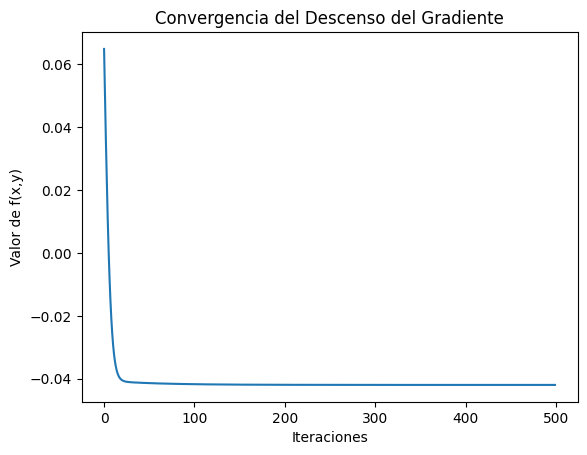

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    term1 = math.sin(0.5 * x**2 - 0.25 * y**2 + 3)
    term2 = math.cos(2 * x + 1 - math.e**y)
    return term1 * term2

# Defino el Gradiente (Derivadas Parciales df/dx y df/dy)
# Calculadas analíticamente:
# u = 0.5x^2 - 0.25y^2 + 3
# v = 2x + 1 - e^y
# f = sin(u) * cos(v)
# df/dx = cos(u)*u'_x * cos(v) + sin(u) * (-sin(v)*v'_x)
# df/dy = cos(u)*u'_y * cos(v) + sin(u) * (-sin(v)*v'_y)

def df(x, y):
    u = 0.5 * x**2 - 0.25 * y**2 + 3
    v = 2 * x + 1 - math.e**y
    
    sin_u = math.sin(u)
    cos_u = math.cos(u)
    sin_v = math.sin(v)
    cos_v = math.cos(v)
    
    # Derivadas internas
    du_dx = x
    du_dy = -0.5 * y
    dv_dx = 2
    dv_dy = -math.e**y
    
    # Regla de la cadena y producto
    # Derivada respecto a x
    grad_x = (cos_u * du_dx * cos_v) - (sin_u * sin_v * dv_dx)
    
    # Derivada respecto a y
    grad_y = (cos_u * du_dy * cos_v) - (sin_u * sin_v * dv_dy)
    
    return grad_x, grad_y

# Algoritmo de Descenso del Gradiente
def gradient_descent(start_x, start_y, learning_rate, epochs):
    x = start_x
    y = start_y
    history = [] # Para guardar el rastro y graficar
    
    for _ in range(epochs):
        val = f(x, y)
        history.append((x, y, val))
        
        grad_x, grad_y = df(x, y)
        
        # Actualizo variables en dirección opuesta al gradiente
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
    return x, y, f(x, y), history

# EJECUCIÓN
# Pruebo con un punto inicial y una tasa de aprendizaje pequeña
punto_inicial = (-0.5, -0.5) # Punto arbitrario cercano a un valle
lr = 0.05
iteraciones = 500

best_x, best_y, min_val, rastreo = gradient_descent(punto_inicial[0], punto_inicial[1], lr, iteraciones)

print(f"Punto Inicial: {punto_inicial}")
print(f"Mínimo encontrado en: x={best_x:.4f}, y={best_y:.4f}")
print(f"Valor mínimo de la función: {min_val:.4f}")

# Visualización simple del descenso de valor
valores = [p[2] for p in rastreo]
plt.plot(valores)
plt.title("Convergencia del Descenso del Gradiente")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de f(x,y)")
plt.show()